# Import libraries

In [1]:
import pickle
from PIL import Image
import numpy as np
from numpy import asarray

# Import Trained Model

In [3]:
load_weight = pickle.load(open('custom.pkl', 'rb'))

# Get Accuracy

In [5]:
acc = load_weight[3]
print(acc)

85.75


# Plot Graphs

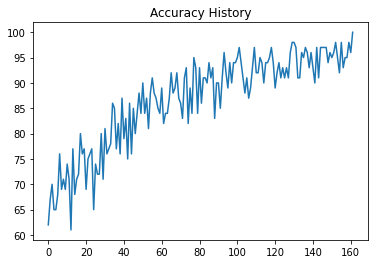

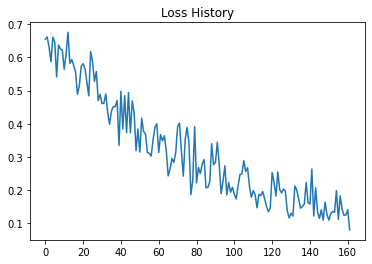

In [10]:
import matplotlib.pyplot as plt

acc_h = load_weight[4]
loss_h = load_weight[5]

plt.plot(acc_h)
plt.title("Accuracy History")
plt.show()

plt.plot(loss_h)
plt.title("Loss History")
plt.show()

# Predict An Image

In [16]:
filters = load_weight[0]
weights = load_weight[1]
biases = load_weight[2]

def stride(img):
      height, weight = img.shape
    
      for i in range(height - 2):
        for j in range(weight - 2):
          # 3x3 filter
          region = img[i:(i + 3), j:(j + 3)]
          yield region, i, j
    
def f_prop(input):

      last_input = input

      height, weight = input.shape
      output = np.zeros((height - 2, weight - 2, 11))

      for region, i, j in stride(input):
        output[i, j] = np.sum(region * filters, axis=(1, 2))

      return output

def max_f(input):

    last_input = input

    height, width, num_filters = input.shape
    output = np.zeros((height // 2, width // 2, num_filters))

    for region, i, j in max_stride(input):
      output[i, j] = np.amax(region, axis=(0, 1))

    return output

def max_stride(img):

    height, width, _ = img.shape
    new_height = height // 2
    new_width = width // 2

    for i in range(new_height):
      for j in range(new_width):
        region = img[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
        yield region, i, j

def soft_f(input):
 
    last_input_shape = input.shape

    input = input.flatten()
    last_input = input

    input_len, nodes = weights.shape

    totals = np.dot(input, weights) + biases
    total_last = totals

    exp = np.exp(total_last)
    return exp / np.sum(exp, axis=0)

t_img = Image.open("knife2.jpg").convert('L')
t_img = t_img.resize((64,64))
t_img = asarray(t_img)

x = f_prop((t_img / 255) - 0.5)
x = max_f(x)
x = soft_f(x)
print("Label 1: {0} Label 2: {1}".format(x[0], x[1]) )

Label 1: 0.9935629341357052 Label 2: 0.006437065864294812
